# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and humidity, though there is slight clumping just north of the equator.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# list(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = {"City": citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name, "Country": citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code}
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [48]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {"units": "imperial","appid": api_key}

# Variable to store the date the weather info was retrieved
weather_date = (time.strftime("%m/%d/%y"))

# Create data frame to store the data pulled via API.
weather_df = pd.DataFrame(columns=["City", "Country", "Date", "Lat", "Lng", "Max Temp (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"])

# initialize record and set counters
recordNum = 0
indexNum = 0

# print header
print("Beginning Data Retrieval")
print("-----------------------------")

# use iterrows to iterate through pandas dataframe
for city in cities:
    # get city name from list
    city_name = city['City']
    country_code = city['Country']

    # add keyword to params dict
    params['q'] = f"{city_name},{country_code}"
    
    # increment record counter
    recordNum += 1

    # assemble url and make API request
    print(f"Processing Record {recordNum} | {city_name}")
    response = requests.get(base_url, params=params).json()
    
    try:
        # retrieve weather data, copy info into dataframe
        weather_df.loc[indexNum, 'City'] = response['name']
        weather_df.loc[indexNum, 'Country'] = response['sys']['country']
        weather_df.loc[indexNum, 'Date'] = response['dt']
        weather_df.loc[indexNum, 'Lat'] = response['coord']['lat']
        weather_df.loc[indexNum, 'Lng'] = response['coord']['lon']
        weather_df.loc[indexNum, 'Max Temp (F)'] = response['main']['temp_max']
        weather_df.loc[indexNum, 'Humidity (%)'] = response['main']['humidity']
        weather_df.loc[indexNum, 'Cloudiness (%)'] = response['clouds']['all']
        weather_df.loc[indexNum, 'Wind Speed (mph)'] = response['wind']['speed']
        indexNum += 1
        
    except (KeyError):
        print(f"     {city_name} not found. Skipping...")

    # Add sleep between API calls so that it doesn't time out
    if recordNum % 5 == 0:
        time.sleep(.5)
        
# print footer          
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | high prairie
Processing Record 2 | palimbang
Processing Record 3 | ribeira grande
Processing Record 4 | banda aceh
Processing Record 5 | ixtapa
Processing Record 6 | kapaa
Processing Record 7 | cape town
Processing Record 8 | hermanus
Processing Record 9 | biloxi
Processing Record 10 | port elizabeth
Processing Record 11 | carnarvon
Processing Record 12 | atuona
Processing Record 13 | rikitea
Processing Record 14 | vaini
Processing Record 15 | victoria
Processing Record 16 | tiksi
Processing Record 17 | luderitz
Processing Record 18 | albany
Processing Record 19 | joshimath
Processing Record 20 | tsihombe
     tsihombe not found. Skipping...
Processing Record 21 | taolanaro
     taolanaro not found. Skipping...
Processing Record 22 | tuktoyaktuk
Processing Record 23 | vangaindrano
Processing Record 24 | jiuquan
Processing Record 25 | lebu
Processing Record 26 | kahului
Processing Record 27 | debre birhan
Proce

Processing Record 218 | clyde river
Processing Record 219 | alta floresta
Processing Record 220 | tabarqah
     tabarqah not found. Skipping...
Processing Record 221 | mazabuka
Processing Record 222 | pantai remis
Processing Record 223 | grafton
Processing Record 224 | puerto maldonado
Processing Record 225 | kodiak
Processing Record 226 | esperance
Processing Record 227 | springbok
Processing Record 228 | tadine
Processing Record 229 | povoa de lanhoso
Processing Record 230 | whitehorse
Processing Record 231 | ruatoria
     ruatoria not found. Skipping...
Processing Record 232 | rocha
Processing Record 233 | airai
     airai not found. Skipping...
Processing Record 234 | kirakira
Processing Record 235 | makakilo city
Processing Record 236 | bandarbeyla
Processing Record 237 | dumai
Processing Record 238 | fare
Processing Record 239 | kavieng
Processing Record 240 | tubuala
Processing Record 241 | padang
Processing Record 242 | kaitangata
Processing Record 243 | ulladulla
Processing Re

Processing Record 426 | iskateley
Processing Record 427 | thessalon
Processing Record 428 | mujiayingzi
Processing Record 429 | porbandar
Processing Record 430 | forbes
Processing Record 431 | beatrice
Processing Record 432 | haren
Processing Record 433 | constitucion
Processing Record 434 | taltal
Processing Record 435 | aklavik
Processing Record 436 | antofagasta
Processing Record 437 | shirokiy
Processing Record 438 | korla
Processing Record 439 | alpena
Processing Record 440 | vao
Processing Record 441 | payson
Processing Record 442 | san patricio
Processing Record 443 | dingle
Processing Record 444 | port moresby
Processing Record 445 | takoradi
Processing Record 446 | kayerkan
Processing Record 447 | isangel
Processing Record 448 | yeppoon
Processing Record 449 | auray
Processing Record 450 | youghal
Processing Record 451 | ouadda
Processing Record 452 | camacha
Processing Record 453 | ekhabi
Processing Record 454 | vallenar
Processing Record 455 | xiongzhou
Processing Record 456

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
# export the data into a .csv
weather_df.to_csv(output_data_file, index=False, header=True)
# display the dataframe
weather_df.head()

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,High Prairie,CA,1552461806,55.43,-116.48,25.22,73,48,5.66
1,Palimbang,PH,1552461787,14.9,120.78,91.4,46,75,6.93
2,Ribeira Grande,PT,1552460400,38.52,-28.7,55.4,76,40,5.82
3,Banda Aceh,ID,1552461553,5.56,95.32,81.2,94,92,3.42
4,Ixtapa,MX,1552461612,20.71,-105.21,73.99,88,75,4.7


In [50]:
# check to see how many records were found to make sure there is a sufficient number (>= 500)
weather_df.count()

City                525
Country             525
Date                525
Lat                 525
Lng                 525
Max Temp (F)        525
Humidity (%)        525
Cloudiness (%)      525
Wind Speed (mph)    525
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

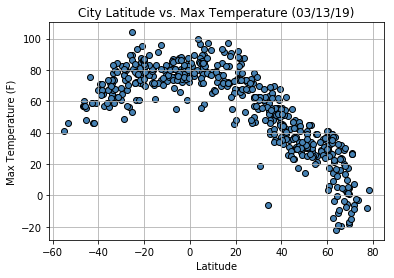

In [51]:
# Plot City Latitude vs. Max Temperature for given date
lat_temp = plt.scatter(weather_df['Lat'], weather_df['Max Temp (F)'], color='steelblue', edgecolor='black')

# Create a title and axis labels
plt.title(f"City Latitude vs. Max Temperature ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Show grid
plt.grid(b=True)

# Output figure
plt.savefig('Output/City Latitude vs. Max Temperature.png')

# Show figure
plt.show()

#### Latitude vs. Humidity Plot

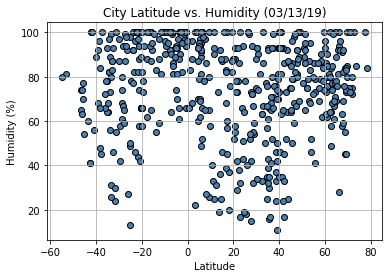

In [52]:
# Plot City Latitude vs. Humidity for given date
lat_hum = plt.scatter(weather_df['Lat'], weather_df['Humidity (%)'], color='steelblue', edgecolor='black')

# Create a title and axis labels
plt.title(f"City Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show grid
plt.grid(b=True)

# Output figure
plt.savefig('Output/City Latitude vs. Humidity.png')

# Show figure
plt.show()

#### Latitude vs. Cloudiness Plot

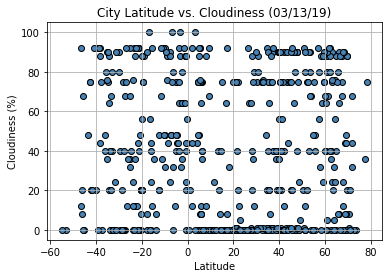

In [53]:
# Plot City Latitude vs. Cloudiness for given date
lat_cloud = plt.scatter(weather_df['Lat'], weather_df['Cloudiness (%)'], color='steelblue', edgecolor='black')

# Create a title and axis labels
plt.title(f"City Latitude vs. Cloudiness ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show grid
plt.grid(b=True)

# Output figure
plt.savefig('Output/City Latitude vs. Cloudiness.png')

# Show figure
plt.show()

#### Latitude vs. Wind Speed Plot

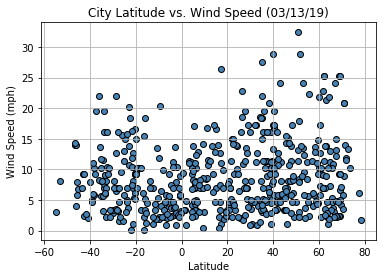

In [54]:
# Plot City Latitude vs. Wind Speed for given date
lat_wind = plt.scatter(weather_df['Lat'], weather_df['Wind Speed (mph)'], color='steelblue', edgecolor='black')

# Create a title and axis labels
plt.title(f"City Latitude vs. Wind Speed ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show grid
plt.grid(b=True)

# Output figure
plt.savefig('Output/City Latitude vs. Wind Speed.png')

# Show figure
plt.show()